In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv(r"C:\Users\ASUS\OneDrive\Desktop\cleancarsencoded.csv")

In [4]:
df

,Unnamed: 0,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_code
0,0,13.0,8,360.0,175.0,3821,11.0,73,1,0
1,1,15.0,8,390.0,190.0,3850,8.5,70,1,1
2,2,17.0,8,304.0,150.0,3672,11.5,72,1,2
3,3,19.4,6,232.0,90.0,3210,17.2,78,1,3
4,4,24.3,4,151.0,90.0,3003,20.1,80,1,3
...,...,...,...,...,...,...,...,...,...,...
393,393,44.0,4,97.0,52.0,2130,24.6,82,2,301
394,394,29.0,4,90.0,70.0,1937,14.2,76,2,302
395,395,41.5,4,98.0,76.0,2144,14.7,80,2,302
396,396,44.3,4,90.0,48.0,2085,21.7,80,2,303


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    float64
 2   displacement  398 non-null    float64
 3   horsepower    398 non-null    float64
 4   weight        398 non-null    float64
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    float64
 7   origin        398 non-null    float64
 8   car_code      398 non-null    float64
dtypes: float64(9)
memory usage: 28.1 KB


In [5]:
df = df.drop('Unnamed: 0', axis = 1)
df.columns

Index(['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_code'],
      dtype='object')

In [6]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
df2 = scaler.fit_transform(df)
df = pd.DataFrame(df2,columns=['mpg', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'model_year', 'origin', 'car_code'])

In [7]:
y = df['mpg']

In [11]:
x = df.drop(columns='mpg')

In [12]:
y

0      0.106383
1      0.159574
2      0.212766
3      0.276596
4      0.406915
         ...   
393    0.930851
394    0.531915
395    0.864362
396    0.938830
397    0.609043
Name: mpg, Length: 398, dtype: float64

In [13]:
x

,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,car_code
0,1.0,0.754522,0.701087,0.626028,0.178571,0.250000,0.0,0.000000
1,1.0,0.832041,0.782609,0.634250,0.029762,0.000000,0.0,0.003289
2,1.0,0.609819,0.565217,0.583782,0.208333,0.166667,0.0,0.006579
3,0.6,0.423773,0.239130,0.452793,0.547619,0.666667,0.0,0.009868
4,0.2,0.214470,0.239130,0.394103,0.720238,0.833333,0.0,0.009868
...,...,...,...,...,...,...,...,...
393,0.2,0.074935,0.032609,0.146583,0.988095,1.000000,0.5,0.990132
394,0.2,0.056848,0.130435,0.091863,0.369048,0.500000,0.5,0.993421
395,0.2,0.077519,0.163043,0.150553,0.398810,0.833333,0.5,0.993421
396,0.2,0.056848,0.010870,0.133825,0.815476,0.833333,0.5,0.996711


In [14]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions on the testing data
y_pred = model.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

Mean Squared Error: 0.01
R-squared: 0.80


In [17]:
X_test.shape, y_test.shape

((80, 8), (80,))

In [18]:
y_test = pd.DataFrame(y_test, columns =['mpg'])
y_test

,mpg
198,0.319149
396,0.938830
33,0.728723
208,0.425532
93,0.345745
...,...
249,0.372340
225,0.398936
367,0.763298
175,0.026596


In [19]:
# sorted the index in ascending order
y_test.reset_index(drop=True, inplace=True)
y_test

,mpg
0,0.319149
1,0.938830
2,0.728723
3,0.425532
4,0.345745
...,...
75,0.372340
76,0.398936
77,0.763298
78,0.026596


In [20]:
# from sklearn.metrics import roc_auc_score
y_pred

array([ 0.31525162,  0.62663245,  0.44278201,  0.41042525,  0.3058253 ,
        0.35556904,  0.51977167,  0.26566725,  0.65901569,  0.48078845,
        0.32189228,  0.59403518,  0.41924101,  0.51669229,  0.45057554,
        0.32607098,  0.65810508,  0.43798246,  0.70905985,  0.49868662,
        0.46416168,  0.34308724,  0.37042351,  0.63294053,  0.16248123,
        0.56745256,  0.62320461,  0.63604837,  0.50262366,  0.1739461 ,
        0.65939697,  0.54205675,  0.58356863,  0.19373561,  0.28499468,
        0.47109773,  0.61992675,  0.36821062,  0.51028793,  0.44452334,
        0.2295159 ,  0.12061379,  0.4837361 ,  0.33679463, -0.00368391,
        0.58530704,  0.15362078,  0.49146436,  0.11293359,  0.54374408,
        0.03282181,  0.08793751,  0.38673812,  0.1401332 ,  0.61132992,
        0.11300617,  0.10161028,  0.06001998,  0.3959942 , -0.0095244 ,
        0.4628034 ,  0.58511043,  0.49791903,  0.29426791,  0.18999483,
        0.57234898,  0.52038026,  0.52457046,  0.07673852,  0.51

In [21]:
y_pred = pd.DataFrame(y_pred, columns =['mpg'])

In [22]:
# sorted the index in ascending order
y_pred.reset_index(drop=True, inplace=True)
y_pred

,mpg
0,0.315252
1,0.626632
2,0.442782
3,0.410425
4,0.305825
...,...
75,0.393285
76,0.461393
77,0.674300
78,-0.027353


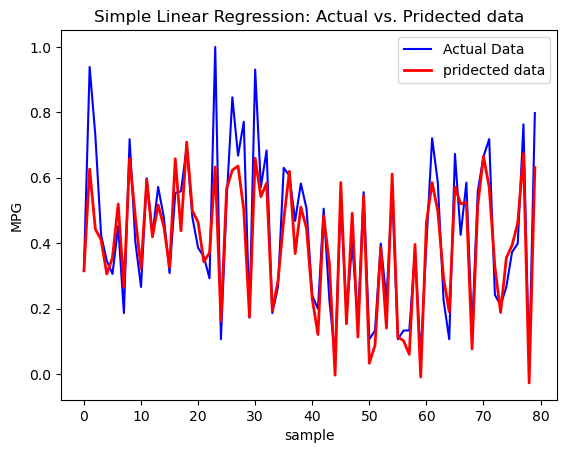

In [23]:
# Plot the regression line and data points
plt.plot(y_test.index, y_test, color='blue', label='Actual Data')
plt.plot(y_pred.index, y_pred, color='red', label='pridected data', linewidth=2)
plt.xlabel('sample')
plt.ylabel('MPG')
plt.legend()
plt.title('Simple Linear Regression: Actual vs. Pridected data')
plt.show()

In [25]:
from sklearn.linear_model import Ridge
clf = Ridge(alpha=1.0)
clf.fit(X, y)

# Make predictions on the testing data
y_pred = clf.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse:.2f}')
print(f'R-squared: {r2:.2f}')

# score(x, y, sample_weight=None)

Mean Squared Error: 0.01
R-squared: 0.81


In [31]:
!pip install tensorflow


In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import accuracy_score


In [41]:


# Split the dataset into training and testing sets (70% train, 30% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
# Build the Feedforward Neural Network model
model = Sequential()

# Input layer + 1st hidden layer (8 input features, 64 neurons in the first hidden layer)
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))

# 2nd hidden layer (32 neurons)
model.add(Dense(32, activation='relu'))

# Output layer (1 neuron for regression)
model.add(Dense(1))

# Compile the model with Mean Squared Error loss function (for regression) and Adam optimizer
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=100, batch_size=10, validation_data=(X_test, y_test), verbose=1)

# Evaluate the model on the test set
test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss (MSE): {test_loss:.4f}')

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error on predictions
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse:.4f}')

# You can also compute R^2 score (Coefficient of Determination) for performance evaluation
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f'R^2 Score: {r2:.4f}')


Epoch 1/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 1s 7ms/step - loss: 0.0860 - val_loss: 0.0203
Epoch 2/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0172 - val_loss: 0.0128
Epoch 3/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0103 - val_loss: 0.0125
Epoch 4/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0081 - val_loss: 0.0089
Epoch 5/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0073 - val_loss: 0.0086
Epoch 6/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0083 - val_loss: 0.0085
Epoch 7/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0065 - val_loss: 0.0078
Epoch 8/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0056 - val_loss: 0.0088
Epoch 9/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0051 - val_loss: 0.0068
Epoch 10/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - loss: 0.0056 - val_loss: 0.0072
Epoch 11/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0060 - val_loss: 0.0069
Epoch 12/100
28/28 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - loss: 0.0